In [79]:
import pandas as pd
import numpy as np
import unittest
import pycaret
src_train = pd.read_csv('data_train.csv', dtype={'ID': str})


print (src_train)

       Unnamed: 0      ID  var_1  var_2  var_3   var_4   var_5  var_6  var_7  \
0               2       3      2     34    0.0    0.00    0.00    0.0    0.0   
1               7      14      2     27    0.0    0.00    0.00    0.0    0.0   
2               8      18      2     26    0.0    0.00    0.00    0.0    0.0   
3              10      23      2     25    0.0    0.00    0.00    0.0    0.0   
4              12      26      2     26    0.0    0.00    0.00    0.0    0.0   
...           ...     ...    ...    ...    ...     ...     ...    ...    ...   
38062       43187   86463      2     36    0.0  176.79  176.79    0.0    0.0   
38063       56100  111953      2     27    0.0    0.00    0.00    0.0    0.0   
38064       43695   87523      2     26    0.0    0.00    0.00    0.0    0.0   
38065        8115   16373      2     32    0.0    0.00    0.00    0.0    0.0   
38066       51281  102362      2     23    0.0    0.00    0.00    0.0    0.0   

       var_8  ...  var_362  var_363  va

### 18. Sobre la variables “var_370”, genera dos variables nuevas:
    a. Aplicando el logaritmo con base mediana.
    b. Normalizando dicha variable. 

In [ ]:
# 1. Función para aplicar logaritmo en base mediana
def logaritmo_base_mediana(df, columna):
    
    mediana = df[columna].median()
    if mediana <= 0:
        raise ValueError("La mediana debe ser mayor que 0 para aplicar logaritmo.")

    df[columna + '_log_med'] = np.log(df[columna]) / np.log(mediana)
    return df


# 2. Función para normalizar una variable
def normalizar_variable(df, columna, metodo="minmax"):

    if metodo == "zscore":
        media = df[columna].mean()
        std = df[columna].std()
        df[columna + '_norm'] = (df[columna] - media) / std
    
    elif metodo == "minmax":
        min_val = df[columna].min()
        max_val = df[columna].max()
        df[columna + '_norm'] = (df[columna] - min_val) / (max_val - min_val)
    
    else:
        raise ValueError("Método no válido. Usa 'zscore' o 'minmax'.")
    
    return df

src_train = logaritmo_base_mediana(src_train, "var_370")
src_train = normalizar_variable (src_train, "var_370")
print (src_train)

       Unnamed: 0      ID  var_1  var_2  var_3   var_4   var_5  var_6  var_7  \
0               2       3      2     34    0.0    0.00    0.00    0.0    0.0   
1               7      14      2     27    0.0    0.00    0.00    0.0    0.0   
2               8      18      2     26    0.0    0.00    0.00    0.0    0.0   
3              10      23      2     25    0.0    0.00    0.00    0.0    0.0   
4              12      26      2     26    0.0    0.00    0.00    0.0    0.0   
...           ...     ...    ...    ...    ...     ...     ...    ...    ...   
38062       43187   86463      2     36    0.0  176.79  176.79    0.0    0.0   
38063       56100  111953      2     27    0.0    0.00    0.00    0.0    0.0   
38064       43695   87523      2     26    0.0    0.00    0.00    0.0    0.0   
38065        8115   16373      2     32    0.0    0.00    0.00    0.0    0.0   
38066       51281  102362      2     23    0.0    0.00    0.00    0.0    0.0   

       var_8  ...  var_364  var_365  va

### 19. Construye una función que reciba una serie de datos (como puede ser una variable en un dataset) y devuelva esa serie normalizada entre 0 y 1. Además la función tiene que comprobar que el formato de la variable de entrada es una serie y elevar un error en caso contrario. Ejecuta esta función sobre la variable que consideres. 

In [ ]:

def normalizar_serie(serie):
    if not isinstance(serie, pd.Series):
        raise TypeError("La entrada debe ser una serie de Pandas")
    
    min_val = serie.min()
    max_val = serie.max()
    
    if min_val == max_val:
        return serie.apply(lambda x: 0)  # Evita la división por cero en caso de valores constantes
    
    return (serie - min_val) / (max_val - min_val)


data = pd.Series([10, 20, 30, 40, 50])
serie_normalizada = normalizar_serie(src_train['var_370'])
print (serie_normalizada)

0        0.016827
1        0.512151
2        0.393636
3        0.029362
4        0.005384
           ...   
38062    0.070384
38063    0.191292
38064    0.013592
38065    0.361119
38066    0.275031
Name: var_370, Length: 38067, dtype: float64


### 20. Genera los test unitarios que consideres para comprobar el funcionamiento correcto de la función anterior. 

In [ ]:
serie = pd.Series([10, 20, 30, 40, 50])
resultado = normalizar_serie(serie)
esperado = pd.Series([0.0, 0.25, 0.5, 0.75, 1.0])
if resultado.equals(esperado):
    print("Correcto")
else:
    print("Incorrecto")

serie = pd.Series([5, 5, 5, 5])
resultado = normalizar_serie(serie)
esperado = pd.Series([0, 0, 0, 0])
if resultado.equals(esperado):
    print("Correcto")
else:
    print("Incorrecto")


# No serie
serie = [10, 20, 30, 40, 50]
resultado = normalizar_serie(serie)

Correcto
Correcto


TypeError: La entrada debe ser una serie de Pandas

### 21. Genera un dataframe con las siguientes variables: 'ID', 'var_2', 'var_276', 'var_325', 'var_278', 'var_275', 'var_280', 'var_327', 'var_63', 'var_369', 'var_1', 'var_279', 'var_340', 'var_339', 'var_165', 'var_177', 'var_172', 'var_168', 'var_114', 'var_47', 'var_105', 'var_194', 'Target', además incluye las variables sintéticas generadas en la pregunta anterior.Guárdalo en un archivo csv que se llame vun_train.csv

In [88]:
    #var_2_normalizada = normalizar_serie(src_train['var_2'])
    columnas_seleccionadas = [
        'ID', 'var_2', 'var_276', 'var_325', 'var_278', 'var_275', 'var_280', 'var_327',
        'var_63', 'var_369', 'var_1', 'var_279', 'var_340', 'var_339', 'var_165', 'var_177',
        'var_172', 'var_168', 'var_114', 'var_47', 'var_105', 'var_194', 'Target'
    ]

    vun_train = src_train[columnas_seleccionadas].copy()
    print (vun_train)
    #vun_train['var_2_normalizada'] = var_2_normalizada.values
    vun_train.to_csv('vun_train.csv', index=False)


           ID  var_2  var_276  var_325  var_278  var_275  var_280  var_327  \
0           3     34        0        0        0        0        0        0   
1          14     27        0        0        0        0        0        0   
2          18     26        0        0        0        0        0        0   
3          23     25        0        0        0        0        0        0   
4          26     26        0        0        0        0        0        0   
...       ...    ...      ...      ...      ...      ...      ...      ...   
38062   86463     36        0        9        3        3        9       27   
38063  111953     27        0        0        0        0        0        0   
38064   87523     26        0        0        0        0        0        0   
38065   16373     32        0        0        0        0        0        0   
38066  102362     23        0        0        0        0        0        0   

       var_63        var_369  ...  var_339  var_165  var_177  v

## 4. Bloque 4. Modelización

### 22. Vuelve a cargar el archivo vun_train.csv sobre la variable vun_train.

In [109]:
vun_train = pd.read_csv('vun_train.csv')
vun_train = vun_train.drop(columns=["ID"])
vun_train["Target"] = vun_train["Target"].astype(bool)

print (vun_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38067 entries, 0 to 38066
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   var_2    38067 non-null  int64  
 1   var_276  38067 non-null  int64  
 2   var_325  38067 non-null  int64  
 3   var_278  38067 non-null  int64  
 4   var_275  38067 non-null  int64  
 5   var_280  38067 non-null  int64  
 6   var_327  38067 non-null  int64  
 7   var_63   38067 non-null  int64  
 8   var_369  38067 non-null  float64
 9   var_1    38067 non-null  int64  
 10  var_279  38067 non-null  int64  
 11  var_340  38067 non-null  float64
 12  var_339  38067 non-null  float64
 13  var_165  38067 non-null  float64
 14  var_177  38067 non-null  float64
 15  var_172  38067 non-null  float64
 16  var_168  38067 non-null  float64
 17  var_114  38067 non-null  int64  
 18  var_47   38067 non-null  int64  
 19  var_105  38067 non-null  int64  
 20  var_194  38067 non-null  int64  
 21  Target   380

### 23. Separa el dataframe vun_train en dos: uno de entrenamiento y otro de validación, con el 70% y el 30% de los registros respectivamente. 

In [101]:
semilla = 183530
from sklearn.model_selection import train_test_split
import numpy as np
# Dividir en entrenamiento (70%) y prueba (30%)
train_df, test_df = train_test_split(vun_train, test_size=0.3, random_state=semilla)

### 24. Realiza un modelo de regresión logística con las variables que consideres oportunas. Interpreta los resultados en función de los p-valores.

In [123]:
# Se usa PYCARET: librería low-code para aprendizaje automático
# Configuración PYCARET
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data = train_df, target = 'Target', session_id = semilla, normalize= True, remove_outliers = True, feature_selection = True, imputation_type = 'simple', numeric_imputation = 'mean')
#s = setup(data = train_df, target = 'Target', session_id = semilla, normalize= False)

[LightGBM] [Info] Number of positive: 727, number of negative: 16992
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1226
[LightGBM] [Info] Number of data points in the train set: 17719, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.041029 -> initscore=-3.151571
[LightGBM] [Info] Start training from score -3.151571


,Description,Value
0,Session id,183530
1,Target,Target
2,Target type,Binary
3,Original data shape,"(26646, 22)"
4,Transformed data shape,"(25713, 5)"
5,Transformed train set shape,"(17719, 5)"
6,Transformed test set shape,"(7994, 5)"
7,Numeric features,21
8,Preprocess,True
9,Imputation type,simple


In [125]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9602,0.7053,0.0000,0.0000,0.0000,0.0000,0.0000,1.0690
ridge,Ridge Classifier,0.9602,0.7075,0.0000,0.0000,0.0000,0.0000,0.0000,0.3130
ada,Ada Boost Classifier,0.9602,0.7835,0.0000,0.0000,0.0000,0.0000,0.0000,0.7010
dummy,Dummy Classifier,0.9602,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3210
svm,SVM - Linear Kernel,0.9601,0.5456,0.0000,0.0000,0.0000,-0.0001,-0.0005,0.4240
lda,Linear Discriminant Analysis,0.9600,0.7075,0.0000,0.0000,0.0000,-0.0004,-0.0013,0.3120
lightgbm,Light Gradient Boosting Machine,0.9595,0.7767,0.0000,0.0000,0.0000,-0.0013,-0.0039,0.4430
gbc,Gradient Boosting Classifier,0.9592,0.7974,0.0014,0.0333,0.0026,0.0005,0.0010,0.7780
knn,K Neighbors Classifier,0.9578,0.6083,0.0161,0.1786,0.0293,0.0229,0.0422,0.6330
rf,Random Forest Classifier,0.9540,0.7137,0.0511,0.1955,0.0808,0.0656,0.0817,0.6560


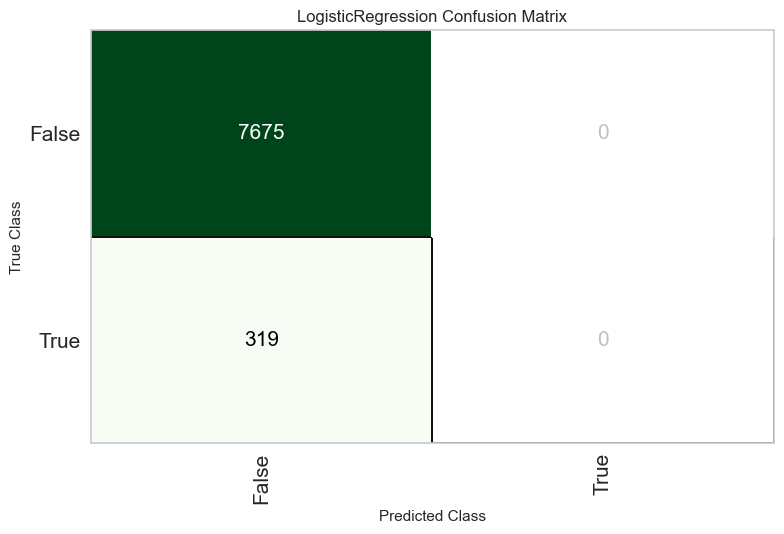

In [126]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

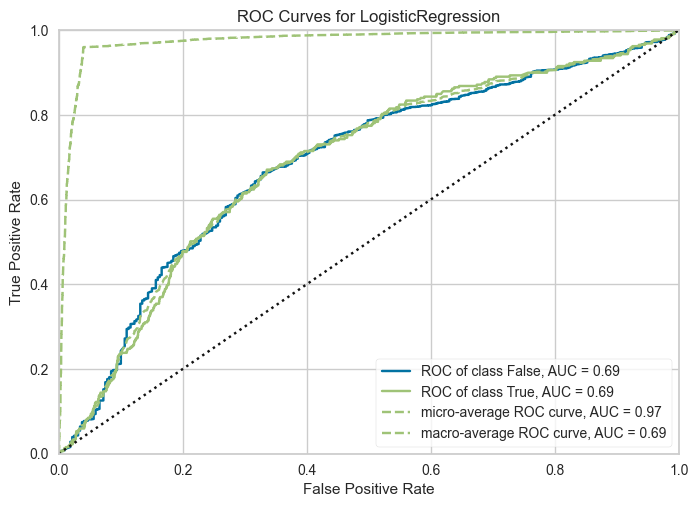

In [127]:
# plot AUC
plot_model(best, plot = 'auc')

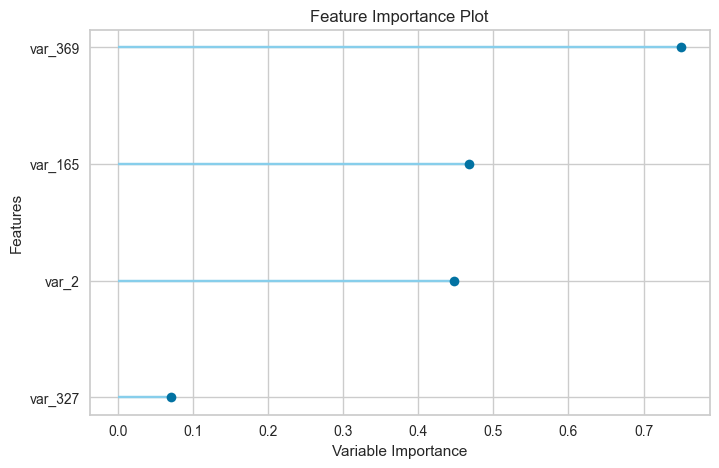

In [128]:
# plot feature importance
plot_model(best, plot = 'feature')